## Time Series

### Naturally add a correlatioon as we sample adjacent points in time - hence we cant use the classical statistical inference.



### Terminologies

Strong Stationary: series is invariant of time 

Weak Stationary: Mean and variance do not change over time.

Non Stationary: Trend Time Series/ Seasonal Time Series.

Here when we say stationary, we mean "Weak Stationarity".

#### Three ways to check if Stationary or not:

##### https://machinelearningmastery.com/time-series-data-stationary-python/


1. Summary Statistics - Sample the data and compare means/variance.
2. Plot - if you see a trend/pattern while plotting it is most likely not stationary.
3. Statistical Test - Augmented Dickey-Fuller test

Stationary time series is required for modeling and when we do not have that (which is in most cases) 
we use different transformations.




In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
female_births=pd.read_csv('daily-total-female-births.csv')
airline_passengers=pd.read_csv('airline-passengers.csv')

In [11]:
def check_stats(data, col):
    t1=data[col][0:round(len(data)/2)]
    t2=data[col][round(len(data)/2):len(data)]
    
    print(t1.mean(), t2.mean(), t1.var(), t2.var())

In [13]:
check_stats(female_births, 'Births')

39.76373626373626 44.185792349726775 49.48530751016939 48.97628055005103


In [15]:
check_stats(airline_passengers, 'Passengers')

182.90277777777777 377.69444444444446 2275.6946400625984 7471.736306729265


In [19]:
def plotseries(data, col):
    data[col].hist()
    plt.show()


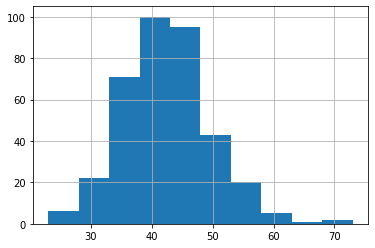

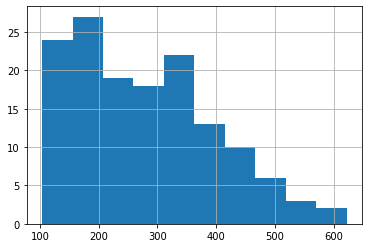

In [23]:
plotseries(female_births, 'Births')
plotseries(airline_passengers, 'Passengers')


### Dickey Fuller Test:

Null Hypothesis: The data has a unit root i.e data is non-stationary

Alternative: Data does not have a unit root.



In [25]:
def dickey_fuller(data, col):
    result = adfuller(data[col])
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [26]:
dickey_fuller(female_births, 'Births')
dickey_fuller(airline_passengers, 'Passengers')

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


The Female births dataset rejects null that is series is stationary and 

the airline passengers does not reject Null i.e we do not have enough evidence to say its stationary.

### Different kinds of transformations that can be done:

1. Difference with lag of x.
2. difference with previous value (First differences)
3. Log transformation

## Teaser question

You flip a fair coin 576 times. Without using a calculator, calculate the probability of flipping at least 312 heads.


Solution:

Coin follows Binomial distribution with p=0.5.
Mean = np = 576x 0.5 = 288
Variance = np(1-p)= 576x 0.25 = 144
SD = 12

Coincidentally 312 is Mean + 2 * SD here. (falls within 95% acc to Normal distribution)
So that would be 5%/2 = 2.5%.


### Stochastic Process:

family of random variables

$X_t$ ~ distribution($mean_t$, $var_t$) where t denotes time.

Stationarity is a characteristic of the stochastic process.



### Before getting into Autocovariance and Autocorrelation, lets get on the basics on Covariance/Correlation.

1. Covariance : direction of relationship between 2 variables

It is affected by the change in scale of the variables

$\operatorname{cov} (X,Y)=\frac{1}{n}\sum_{i=1}^n (x_i-E(X))(y_i-E(Y))$





2. Correlation: direction and strength of relationship between 2 variables 

It is a function of covariance and not affected by change in scale between two variables. It is dimensionless.

$\operatorname{corr} (X,Y)=\frac{1}{(n)(\sigma_{x})(\sigma_{y})}\sum_{i=1}^n (x_i-E(X))(y_i-E(Y))=
            \frac{\operatorname{cov} (X,Y)}{(\sigma_{x})(\sigma_{y})}$


Range of correlation = (-1, 1)


In the language of Regression, the Correlation and R squared (Explained Variation) are strongly related.

$(Correlation)^2 = R^2 $

Sign of Correlation = Sign of Regression Slope

#### Note: Use n-1 instead of n if the Standard deviation is Sample Standard Deviation.



### Moving on to Autocovariance and Autocorrelation.


AutoCovariance:

$\operatorname{\gamma} (s, t)=\operatorname{cov} (X_{s}, X_{t})$

$\operatorname{\gamma} (k)=\operatorname{\gamma} (t, t+k) \approx c_{k}$ where k is the "LAG"

If k = 0, then we are basically get $covariance(X_{t},X_{t})$ = variance 



Since we are assuming the time series is Weak stationary, the mean and sd will remain the same and hence the only factor autocovariance depends on is the LAG i.e k and it does not matter what t is.


So with that the autocovariance coefficient is basically:

$c_{k}=\frac{1}{(N)}\sum_{t=1}^{N-k} (x_t-E(X))(x_{t+k}-E(X))$

In [61]:
### Calculate Autocovariance using stats library:
import statsmodels.tsa.api as smt
smt.stattools.acovf(female_births['Births'][0:5])

## The output is the autocovariance with lag 0, 1, 2 and so on..

array([25.84 , -1.712, -7.344, -5.016,  1.152])

In [60]:
## Raw implementation
def cov_auto_samp(X,delta):
    N = len(X)
    Xs = np.average(X)
    autoCov = 0
    for i in np.arange(0, N-delta):
        autoCov += (X[i+delta]-Xs)*(X[i]-Xs)
    return autoCov/len(X)

In [59]:
for i in range(0, 5):
    print(cov_auto_samp(female_births['Births'][0:5], i))

25.839999999999996
-1.7120000000000033
-7.344000000000003
-5.015999999999998
1.152000000000003


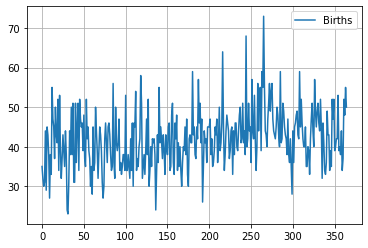

In [62]:
female_births.plot(grid=True)

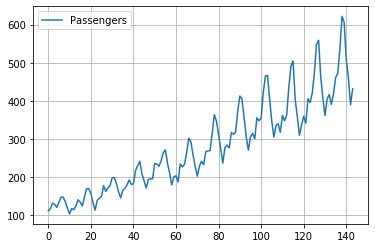

In [63]:
airline_passengers.plot(grid=True)

### Correlation between two time series.

To get the correlation between two time series, we get the correlatioon between the percent change instead of actual values. If we use the actual values, we may get strong correlation which may not make sense in cases especially when two time series have similar trend but are completely unrelated.


#### Autocorrelation:

Correlation of time series with a lagged version of itself.

In Mathematical forms deriving from autocovariance it can be written as:


$\operatorname{\rho} (k)=\frac{\gamma_k}{\gamma_0} $

$\rho_{k}=\frac{1}{(N)(\sigma_{x_t}^2)}\sum_{t=1}^{N-k} (x_t-E(X))(x_{t+k}-E(X))$

In [87]:
female_births['Births'].autocorr()  # by default lag of 1

0.21787727006731272

In [88]:
acf(female_births['Births']) # all lags autocorrelation

array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107,  0.26386846,  0.14012147,  0.06070286,  0.08716232,
        0.05038825,  0.0650489 ,  0.11466565,  0.1552232 ,  0.12850638,
        0.10358981,  0.09734643,  0.04912286,  0.04022798,  0.05838555,
        0.05359812,  0.10151053,  0.08268663,  0.0912185 ,  0.11192192,
        0.05652846])

In [115]:
# raw implementation with lag=1
def autocorr(data, col):
    data['lagged_col']=data[col].shift(1)
    #print(data['lagged_col'])
    return data[col].corr(data['lagged_col'])

In [116]:
autocorr(female_births,'Births')

0.21787727006731272

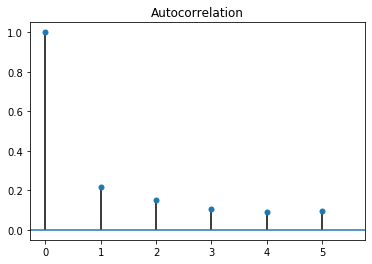

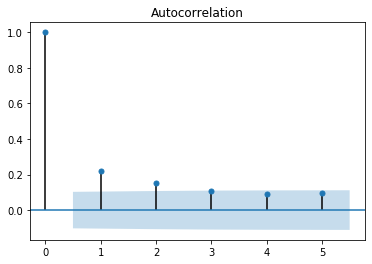

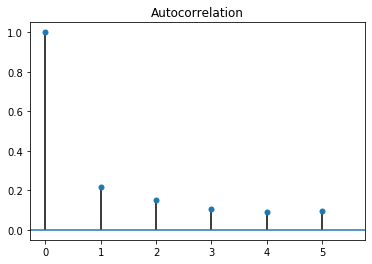

In [127]:
smt.graphics.plot_acf(female_births['Births'],lags=5,alpha=0.05) 
smt.graphics.plot_acf(female_births['Births'],lags=5,alpha=1) 

### The above is basically plotting the autocorrelation with lag 0, 1 and so on.

#### Alpha is the confidence interval is the chance that the sample autocorrelation falls outside the window.

### Sampling in Time series

Sometimes noticeable difference might not be visible daily and the data should be resampled to sample annually or weekly.

One such example is interest rates - daily interest rates will not fluctuate a lot but they do fluctuate yearly, hence it is important to sample by year.



In [129]:
female_births.index=pd.to_datetime(female_births['Date'])
print(female_births.head())

#resampling monthly, "A" for annually and so on.
female_births[['Date', 'Births']].resample(rule="M").last()

                 Date  Births  lagged_col
Date                                     
1959-01-01 1959-01-01      35         NaN
1959-01-02 1959-01-02      32        35.0
1959-01-03 1959-01-03      30        32.0
1959-01-04 1959-01-04      31        30.0
1959-01-05 1959-01-05      44        31.0


,Date,Births
Date,,
1959-01-31,1959-01-31,24
1959-02-28,1959-02-28,30
1959-03-31,1959-03-31,41
1959-04-30,1959-04-30,51
1959-05-31,1959-05-31,38
1959-06-30,1959-06-30,59
1959-07-31,1959-07-31,41
1959-08-31,1959-08-31,44
1959-09-30,1959-09-30,56


### Next up:

Random Walk
Moving Averages

